模型训练-》模型调参-》模型融合

# 模型初训
- lr/svc/dt
- rf/xgb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model_metrics import model_metrics

In [3]:
import pickle
with open('29_features.pkl','rb') as f:
    X = pickle.load(f, encoding = 'gbk')
with open('new_label.pkl','rb') as f:
    y = pickle.load(f)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 2018)

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

[准确率] 训练集： 0.8010 测试集： 0.7870
[精准率] 训练集： 0.7038 测试集： 0.8037
[召回率] 训练集： 0.3561 测试集： 0.3120
[f1-score] 训练集： 0.4729 测试集： 0.4242
[auc值] 训练集： 0.8052 测试集： 0.7810


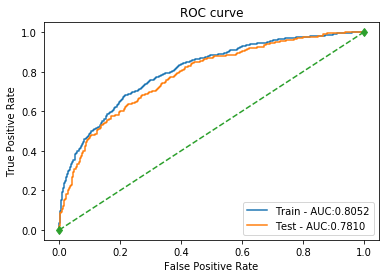

In [7]:
model_metrics(lr, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8040 测试集： 0.7533
[精准率] 训练集： 0.6553 测试集： 0.8097
[召回率] 训练集： 0.4604 测试集： 0.3872
[f1-score] 训练集： 0.5408 测试集： 0.4413
[auc值] 训练集： 0.7782 测试集： 0.6894


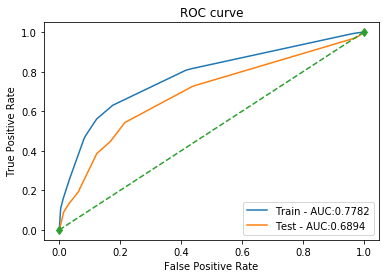

In [8]:
#DT
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)
model_metrics(dt,X_train,X_test, y_train, y_test)

[准确率] 训练集： 0.8266 测试集： 0.7877
[精准率] 训练集： 0.8391 测试集： 0.7981
[召回率] 训练集： 0.3813 测试集： 0.2786
[f1-score] 训练集： 0.5243 测试集： 0.3976
[auc值] 训练集： 0.8900 测试集： 0.7813


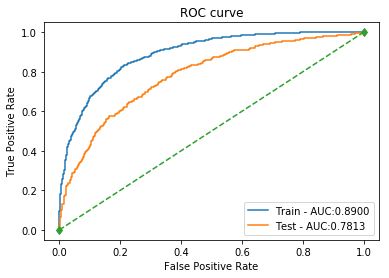

In [9]:
#rf
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=120, max_depth=9, min_samples_split=50,
                            min_samples_leaf=20, max_features = 9,oob_score=True, random_state=2018)
rf.fit(X_train, y_train)

model_metrics(rf, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8464 测试集： 0.7849
[精准率] 训练集： 0.8458 测试集： 0.8121
[召回率] 训练集： 0.4736 测试集： 0.3621
[f1-score] 训练集： 0.6072 测试集： 0.4586
[auc值] 训练集： 0.8970 测试集： 0.7758


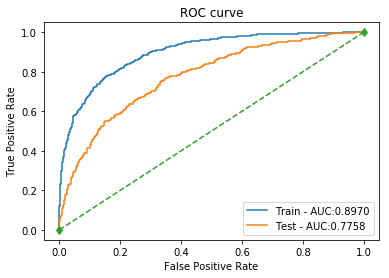

In [10]:
#xgboost
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

model_metrics(xgb,X_train, X_test, y_train, y_test)

In [11]:
#SVC
from sklearn import svm
svm_linear = svm.SVC(kernel = 'linear', probability=True).fit(X_train, y_train)

In [12]:
svm_poly = svm.SVC(kernel = 'poly', probability=True).fit(X_train, y_train)
svm_rbf = svm.SVC(probability=True).fit(X_train, y_train)
svm_sigmoid = svm.SVC(kernel = 'sigmoid',probability=True).fit(X_train, y_train)

[准确率] 训练集： 0.7953 测试集： 0.7751
[精准率] 训练集： 0.7782 测试集： 0.7827
[召回率] 训练集： 0.2566 测试集： 0.2006
[f1-score] 训练集： 0.3859 测试集： 0.3097
[auc值] 训练集： 0.8080 测试集： 0.7864


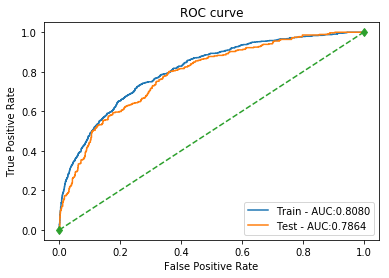

In [14]:
model_metrics(svm_linear,X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8124 测试集： 0.7631
[精准率] 训练集： 0.9200 测试集： 0.7712
[召回率] 训练集： 0.2758 测试集： 0.1421
[f1-score] 训练集： 0.4244 测试集： 0.2318
[auc值] 训练集： 0.8646 测试集： 0.7335


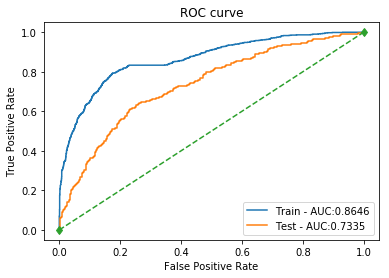

In [13]:
model_metrics(svm_poly,X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8218 测试集： 0.7828
[精准率] 训练集： 0.8375 测试集： 0.7920
[召回率] 训练集： 0.3585 测试集： 0.2479
[f1-score] 训练集： 0.5021 测试集： 0.3648
[auc值] 训练集： 0.8545 测试集： 0.7480


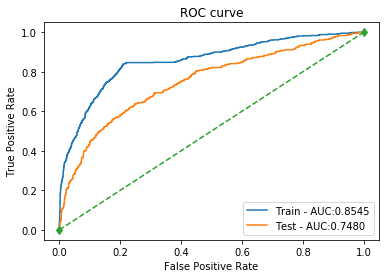

In [15]:
model_metrics(svm_rbf,X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7328 测试集： 0.7246
[精准率] 训练集： 0.4650 测试集： 0.8169
[召回率] 训练集： 0.4376 测试集： 0.4568
[f1-score] 训练集： 0.4509 测试集： 0.4549
[auc值] 训练集： 0.6872 测试集： 0.6922


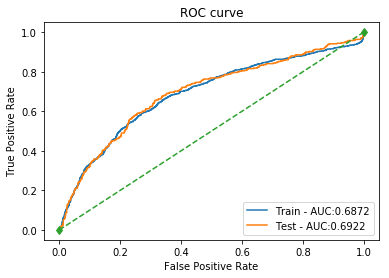

In [16]:
model_metrics(svm_sigmoid,X_train, X_test, y_train, y_test)